In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

In [2]:
os.chdir(r"C:\Users\riama\Desktop\Machine_learning")

In [3]:
taxi=pd.read_parquet("yellow_tripdata_2022-06.parquet")

In [4]:
taxi.shape

(3558124, 19)

In [5]:
taxi.head(4)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.0,3.00,0.5,2.0,6.55,0.3,44.35,2.5,0.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.0,3.00,0.5,0.0,0.00,0.3,17.80,2.5,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.0,0.50,0.5,5.0,6.55,0.3,42.60,2.5,1.25
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.0,1.75,0.5,0.0,0.00,0.3,39.55,0.0,1.25


In [6]:
from sklearn.model_selection import train_test_split
taxi_data,_=train_test_split(taxi,test_size=.98,random_state=0)

In [7]:
taxi_data.shape

(71162, 19)

In [8]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71162 entries, 11293 to 305711
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               71162 non-null  int64         
 1   tpep_pickup_datetime   71162 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  71162 non-null  datetime64[ns]
 3   passenger_count        68502 non-null  float64       
 4   trip_distance          71162 non-null  float64       
 5   RatecodeID             68502 non-null  float64       
 6   store_and_fwd_flag     68502 non-null  object        
 7   PULocationID           71162 non-null  int64         
 8   DOLocationID           71162 non-null  int64         
 9   payment_type           71162 non-null  int64         
 10  fare_amount            71162 non-null  float64       
 11  extra                  71162 non-null  float64       
 12  mta_tax                71162 non-null  float64       
 

In [9]:
# target variable: total amount

#### EDA

In [10]:
taxi_data["VendorID"].value_counts()

2    50189
1    20830
6      143
Name: VendorID, dtype: int64

In [11]:
def univar(data,y):
    unique_count= data[y].nunique()
    missing= data[y].isnull().sum()
    unique_cat= list(data[y].unique())
    f1=pd.DataFrame(data[y].value_counts(dropna=False))
    f1.rename(columns={y:"Count"},inplace=True)
    f2=pd.DataFrame(data[y].value_counts(normalize=True))
    f2.rename(columns={y:"percentage"},inplace=True)
    f2["percentage"]=round(f2["percentage"]*100,2)  #(f2["percentage"]*100).round(2).astype(str)+"%" (if we want to add percentage
                                                    #then we have to convert it to string then will add %symbol)
    ff=pd.concat([f1,f2],axis=1)
    
    myvalue= {"missing":missing,"unique category": unique_cat,"unique_count":unique_count}
    print(f"value count and %\n",ff)
    sns.countplot(data=data,x=y)
    return myvalue

In [12]:
def univar_num(y):
    missing= y.isnull().sum()
    min1=round(y.min(),2)
    max1=round(y.max(),2)
    mean=round(y.mean(),2)
    var=round(y.var(),2)
    std=round(y.std(),2)
    range1=round(max1-min1,2)
    q1= round(y.quantile(.25),2)
    q2=round(y.quantile(.5),2)
    q3=round(y.quantile(.75),2)
    skew=round(y.skew(),2)
    kurt=round(y.kurt(),2)
    myval={"Missing Value":missing,"Minimum value": min1,"Maximum value": max1, "Mean value": mean,"Variance": var,"Standard Deviation": std,"Range": range1,
          "Quantile1":q1,"Quantile2": q2,"Quantile3":q3,"Skewness": skew,"kurtosis":kurt}
#     sns.histplot(y)
#     plt.show()
#     sns.boxplot(data=taxi_data,y=y)
#     plt.show()
    return myval

value count and %
    Count  percentage
2  50189       70.53
1  20830       29.27
6    143        0.20


{'missing': 0, 'unique category': [2, 1, 6], 'unique_count': 3}

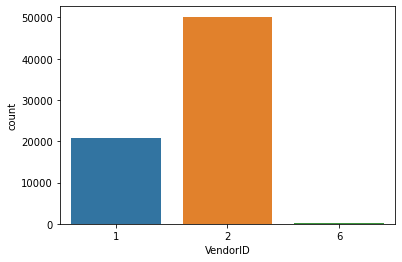

In [13]:
univar(taxi_data,"VendorID")

In [14]:
taxi_data["VendorID"]=taxi_data["VendorID"].replace([6,5] ,"others")
taxi_data["VendorID"].value_counts()

2         50189
1         20830
others      143
Name: VendorID, dtype: int64

In [15]:
taxi_data.dtypes[taxi_data.dtypes=="object"]

VendorID              object
store_and_fwd_flag    object
dtype: object

value count and %
       Count  percentage
N     67674       98.79
None   2660         NaN
Y       828        1.21


{'missing': 2660, 'unique category': ['N', None, 'Y'], 'unique_count': 2}

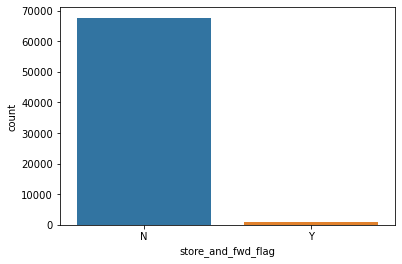

In [16]:
univar(taxi_data,"store_and_fwd_flag")

In [17]:
taxi_data["store_and_fwd_flag"]=taxi_data["store_and_fwd_flag"].replace(np.nan,"other")

In [18]:
taxi_data["store_and_fwd_flag"].isnull().sum()

0

In [19]:
taxi_data["RatecodeID"]=taxi_data["RatecodeID"].map({1:"Standard_rate",2:"JFK",3:"Newark",4:"Nassau_or_Westchester",5:"Negotiated_fare",6:"Group_ride",99:"other"})

In [20]:
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

value count and %
                        Count  percentage
Standard_rate          64553       94.24
JFK                     2826        4.13
NaN                     2660         NaN
Negotiated_fare          612        0.89
Newark                   217        0.32
other                    206        0.30
Nassau_or_Westchester     88        0.13


{'missing': 2660,
 'unique category': ['Standard_rate',
  nan,
  'Negotiated_fare',
  'JFK',
  'Newark',
  'Nassau_or_Westchester',
  'other'],
 'unique_count': 6}

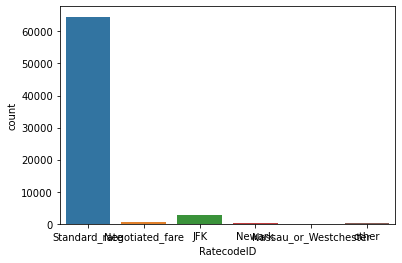

In [21]:
univar(taxi_data,"RatecodeID")

In [22]:
taxi_data["RatecodeID"]=taxi_data["RatecodeID"].replace(np.nan,"other")

In [23]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

value count and %
    Count  percentage
1  53921       75.77
2  13873       19.49
0   2660        3.74
3    363        0.51
4    345        0.48


{'missing': 0, 'unique category': [1, 2, 0, 4, 3], 'unique_count': 5}

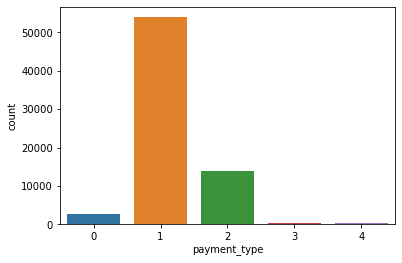

In [24]:
univar(taxi_data,"payment_type")

In [25]:
taxi_data["payment_type"]=taxi_data["payment_type"].map({1:"Credit_card",2:"Cash",3:"No_charge",4:"Dispute",0:"Unknown"})

In [26]:
taxi_data["payment_type"].value_counts(dropna=False)

Credit_card    53921
Cash           13873
Unknown         2660
No_charge        363
Dispute          345
Name: payment_type, dtype: int64

In [27]:
univar_num(taxi_data["passenger_count"])

{'Missing Value': 2660,
 'Minimum value': 0.0,
 'Maximum value': 6.0,
 'Mean value': 1.4,
 'Variance': 0.92,
 'Standard Deviation': 0.96,
 'Range': 6.0,
 'Quantile1': 1.0,
 'Quantile2': 1.0,
 'Quantile3': 1.0,
 'Skewness': 2.74,
 'kurtosis': 8.32}

In [28]:
univar_num(taxi_data["trip_distance"])

{'Missing Value': 0,
 'Minimum value': 0.0,
 'Maximum value': 111375.9,
 'Mean value': 5.14,
 'Variance': 174326.41,
 'Standard Deviation': 417.52,
 'Range': 111375.9,
 'Quantile1': 1.14,
 'Quantile2': 1.94,
 'Quantile3': 3.63,
 'Skewness': 266.71,
 'kurtosis': 71143.4}

In [29]:
univar_num(taxi_data["PULocationID"])

{'Missing Value': 0,
 'Minimum value': 1,
 'Maximum value': 265,
 'Mean value': 164.48,
 'Variance': 4309.39,
 'Standard Deviation': 65.65,
 'Range': 264,
 'Quantile1': 132.0,
 'Quantile2': 162.0,
 'Quantile3': 234.0,
 'Skewness': -0.26,
 'kurtosis': -0.89}

In [30]:
taxi_data.drop(columns=["DOLocationID","PULocationID"],inplace=True)  #removing this two as both are categorical and we are not 
                                                          #known about it in details

In [31]:
univar_num(taxi_data["fare_amount"]) #minimum value is in negative

{'Missing Value': 0,
 'Minimum value': -500.0,
 'Maximum value': 6977.0,
 'Mean value': 15.3,
 'Variance': 2259.4,
 'Standard Deviation': 47.53,
 'Range': 7477.0,
 'Quantile1': 7.0,
 'Quantile2': 10.5,
 'Quantile3': 16.5,
 'Skewness': 132.37,
 'kurtosis': 19353.71}

In [32]:
taxi_data[taxi_data["fare_amount"]<=0].shape

(514, 17)

In [33]:
#Removing the columns which have fare amount less than 2.5 bcz in usa fare amount is till 2.5 hence it cannot be low
taxi1=taxi_data[taxi_data["fare_amount"]>=2.5]

In [34]:
taxi1.dtypes[taxi1.dtypes!="object"].index

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [35]:
univar_num(taxi1["extra"])

{'Missing Value': 0,
 'Minimum value': 0.0,
 'Maximum value': 8.25,
 'Mean value': 1.03,
 'Variance': 1.58,
 'Standard Deviation': 1.26,
 'Range': 8.25,
 'Quantile1': 0.0,
 'Quantile2': 0.5,
 'Quantile3': 2.5,
 'Skewness': 1.14,
 'kurtosis': 0.75}

In [36]:
univar_num(taxi1["mta_tax"])

{'Missing Value': 0,
 'Minimum value': 0.0,
 'Maximum value': 2.78,
 'Mean value': 0.49,
 'Variance': 0.0,
 'Standard Deviation': 0.05,
 'Range': 2.78,
 'Quantile1': 0.5,
 'Quantile2': 0.5,
 'Quantile3': 0.5,
 'Skewness': -6.5,
 'kurtosis': 188.41}

In [37]:
univar_num(taxi1["tip_amount"])

{'Missing Value': 0,
 'Minimum value': 0.0,
 'Maximum value': 98.0,
 'Mean value': 2.81,
 'Variance': 10.4,
 'Standard Deviation': 3.22,
 'Range': 98.0,
 'Quantile1': 1.0,
 'Quantile2': 2.2,
 'Quantile3': 3.45,
 'Skewness': 3.82,
 'kurtosis': 44.22}

In [38]:
univar_num(taxi1["tolls_amount"])

{'Missing Value': 0,
 'Minimum value': 0.0,
 'Maximum value': 52.0,
 'Mean value': 0.57,
 'Variance': 4.33,
 'Standard Deviation': 2.08,
 'Range': 52.0,
 'Quantile1': 0.0,
 'Quantile2': 0.0,
 'Quantile3': 0.0,
 'Skewness': 4.8,
 'kurtosis': 36.86}

In [39]:
univar_num(taxi1["improvement_surcharge"])

{'Missing Value': 0,
 'Minimum value': 0.0,
 'Maximum value': 0.3,
 'Mean value': 0.3,
 'Variance': 0.0,
 'Standard Deviation': 0.0,
 'Range': 0.3,
 'Quantile1': 0.3,
 'Quantile2': 0.3,
 'Quantile3': 0.3,
 'Skewness': -76.71,
 'kurtosis': 5881.83}

In [40]:
taxi.drop(columns=["improvement_surcharge"],inplace=True)  #removing this as values are constant

In [41]:
univar_num(taxi1["total_amount"])

{'Missing Value': 0,
 'Minimum value': 3.3,
 'Maximum value': 6981.3,
 'Mean value': 22.45,
 'Variance': 2374.85,
 'Standard Deviation': 48.73,
 'Range': 6978.0,
 'Quantile1': 12.36,
 'Quantile2': 16.3,
 'Quantile3': 23.3,
 'Skewness': 123.63,
 'kurtosis': 17609.46}

In [42]:
univar_num(taxi1["congestion_surcharge"])

{'Missing Value': 2658,
 'Minimum value': 0.0,
 'Maximum value': 2.5,
 'Mean value': 2.31,
 'Variance': 0.44,
 'Standard Deviation': 0.67,
 'Range': 2.5,
 'Quantile1': 2.5,
 'Quantile2': 2.5,
 'Quantile3': 2.5,
 'Skewness': -3.17,
 'kurtosis': 8.08}

In [43]:
taxi1["congestion_surcharge"]

11293      2.5
3241804    2.5
2122208    2.5
645015     2.5
1752107    2.5
          ... 
2249467    2.5
963395     2.5
2215104    2.5
1484405    2.5
305711     2.5
Name: congestion_surcharge, Length: 70637, dtype: float64

In [44]:
univar_num(taxi1["airport_fee"])

{'Missing Value': 2658,
 'Minimum value': 0.0,
 'Maximum value': 1.25,
 'Mean value': 0.1,
 'Variance': 0.11,
 'Standard Deviation': 0.34,
 'Range': 1.25,
 'Quantile1': 0.0,
 'Quantile2': 0.0,
 'Quantile3': 0.0,
 'Skewness': 3.15,
 'kurtosis': 7.92}

### Feature Engineering

In [45]:
taxi1["tpep_pickup_datetime"].min()

Timestamp('2002-10-21 12:53:50')

In [46]:
taxi1["tpep_pickup_datetime"].max()

Timestamp('2022-07-01 00:36:12')

In [47]:
# Date: month, weekend/weekday,public_holiday,time of pickup(early morning, morning, afternoon,evening,night,late night)
# two date: duration

In [48]:
taxi1["month"]=taxi1["tpep_pickup_datetime"].dt.month
taxi1["year"]=taxi1["tpep_pickup_datetime"].dt.year
taxi1["week_of_day"]=taxi1["tpep_pickup_datetime"].dt.dayofweek
taxi1["day"]=taxi1["tpep_pickup_datetime"].dt.day
taxi1["hours"]=taxi1["tpep_pickup_datetime"].dt.hour
taxi1["minutes"]=taxi1["tpep_pickup_datetime"].dt.minute


C:\Users\riama\AppData\Local\Temp\ipykernel_7528\1187736738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1["month"]=taxi1["tpep_pickup_datetime"].dt.month
C:\Users\riama\AppData\Local\Temp\ipykernel_7528\1187736738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1["year"]=taxi1["tpep_pickup_datetime"].dt.year
C:\Users\riama\AppData\Local\Temp\ipykernel_7528\1187736738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [49]:
taxi1["hours"].value_counts()

18    5002
17    4698
19    4608
15    4323
14    4309
16    4248
13    3966
12    3855
21    3792
20    3765
11    3677
22    3587
10    3333
9     3038
23    2869
8     2746
0     2060
7     2041
1     1313
6     1076
2      880
3      574
5      489
4      388
Name: hours, dtype: int64

In [50]:
taxi1=taxi1[taxi1["month"]==6]
taxi1=taxi1[taxi1["year"]==2022]

In [51]:
taxi1["isweekend"]=np.where(taxi1["week_of_day"].isin([5,6]),1,0)
#hm yha pr kr rhe haii jha pr week hmara 5,6 hai too vha 1 aajyeega vrna 0

In [52]:
def day_cut(x):
    if x<=10:
        return "starting_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    else:
        return "end_of_month"

In [53]:
taxi1["day_cut"]=taxi1["day"].apply(day_cut)

In [54]:
taxi1["day_cut"].value_counts()

starting_of_month    24393
mid_of_month         23261
end_of_month         22973
Name: day_cut, dtype: int64

In [55]:
# early morning: 4-8 
# morning= 8-12
# afternoon: 12-4 (12-16)
# evening: 4-8  (16-20)
# night: 8-12   (20-24)
# midnight: 12-4

In [56]:
def hour_category(x):
    if x>=4 and x<8:
        return "early_morning"
    elif x>=8 and x<12:
        return "morning"
    elif x>=12 and x<16:
        return "afternoon"
    elif x>=16 and x<20:
        return "evening"
    elif x>=20 and x<24:
        return "night"
    elif x>=0 and x<4:
        return "midnight"
    else:
        return "unknown"

In [57]:
taxi1["hours_cat"]=taxi1["hours"].apply(hour_category)

In [58]:
taxi1["hours_cat"].value_counts()

evening          18554
afternoon        16450
night            14011
morning          12794
midnight          4824
early_morning     3994
Name: hours_cat, dtype: int64

In [59]:
taxi1["duration"]=((taxi1["tpep_dropoff_datetime"]-taxi1["tpep_pickup_datetime"])/pd.Timedelta(minutes=1)) #kitni duration liya hai 

In [60]:
taxi1["duration"].min()

-0.85

In [61]:
taxi1["airport_pick_up"]=np.where(taxi1["airport_fee"]==0,0,1)

In [62]:
taxi1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,year,week_of_day,day,hours,minutes,isweekend,day_cut,hours_cat,duration,airport_pick_up
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,...,2022,2,1,8,48,0,starting_of_month,morning,12.166667,0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,...,2022,2,29,12,30,0,end_of_month,afternoon,49.183333,0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,...,2022,6,19,1,3,1,mid_of_month,midnight,23.900000,0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,...,2022,0,6,17,16,0,starting_of_month,evening,18.900000,0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,...,2022,2,15,22,9,0,mid_of_month,night,18.483333,0


In [63]:
taxi1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'month', 'year', 'week_of_day',
       'day', 'hours', 'minutes', 'isweekend', 'day_cut', 'hours_cat',
       'duration', 'airport_pick_up'],
      dtype='object')

In [64]:
def fare_cut(x): #question tha ki kitni range of money mai sbse jyada book ho rhi thi cars 
    if x<=10:
        return "(0,10]"
    elif x>10 and x<=20:
        return "(10-20]"
    elif x>20 and x<=30:
        return "(20-30]"
    elif x>30 and x<=40:
        return "(30-40]"
    elif x>40 and x<=50:
        return "(40-50]"
    elif x>50 and x<=60:
        return "(50-60]"
    elif x>60 and x<=70:
        return "(60-70]"
    elif x>70 and x<=80:
        return "(70-80]"
    elif x>80 and x<=90:
        return "(80-90]"
    elif x>90 and x<=100:
        return "(90-100]"
    else:
        return "100+"
taxi1["fare_cat"]=taxi1["total_amount"].apply(fare_cut)

<AxesSubplot:>

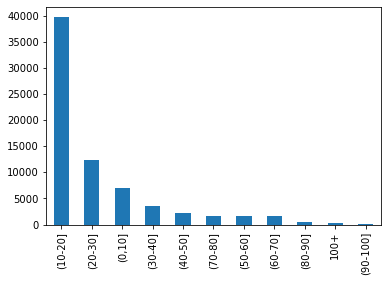

In [65]:
taxi1["fare_cat"].value_counts().plot(kind="bar")

In [66]:
taxi1["total_amount"].value_counts()

10.80     1028
11.80      978
12.36      969
10.30      965
12.80      963
          ... 
75.86        1
205.55       1
24.22        1
42.19        1
85.10        1
Name: total_amount, Length: 3937, dtype: int64

In [67]:
def duration_cat(x):
    if x<15:
        return "duration_bt_0_15m"
    elif x>=15 and x<30:
        return "duration_bt_0_30m"
    elif x>=30 and x<60:
        return "duration_bt_30_60m"
    elif x>=60 and x<120:
        return "duration_bt_60_120m"
    else:
        return "duration_morethan_120m"

In [68]:
taxi1["duration_cat"]=taxi1["duration"].apply(duration_cat)

<AxesSubplot:>

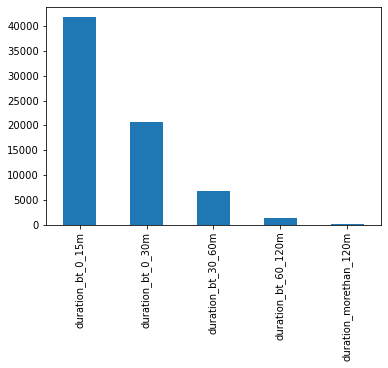

In [69]:
taxi1["duration_cat"].value_counts().plot(kind="bar")

#### Missing value

In [70]:
taxi1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
minutes                     0
isweekend                   0
day_cut                     0
hours_cat                   0
duration                    0
airport_pick_up             0
fare_cat                    0
duration_cat                0
dtype: int64

In [71]:
temp0=taxi1[taxi1["passenger_count"].isnull()]

In [72]:
taxi2=taxi1.dropna()

In [73]:
taxi2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
month                    0
year                     0
week_of_day              0
day                      0
hours                    0
minutes                  0
isweekend                0
day_cut                  0
hours_cat                0
duration                 0
airport_pick_up          0
fare_cat                 0
duration_cat             0
dtype: int64

#### Outliers Treatment

In [74]:
taxi2.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,67969.0,1.398682,0.959825,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00,2.00,3.000000,4.0000,4.000000,5.000000,6.000,6.000000
trip_distance,67969.0,3.541137,4.782556,0.0,0.000000,0.250000,0.4,0.470000,0.510000,1.130000,1.900000,3.55,9.02,15.496000,17.0928,17.879600,18.680000,20.260,410.170000
fare_amount,67969.0,15.271000,48.398615,2.5,3.500000,4.000000,4.0,4.500000,4.500000,7.000000,10.500000,16.50,31.20,52.000000,52.0000,52.000000,52.000000,62.500,6977.000000
extra,67969.0,1.069702,1.263564,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,2.50,3.00,3.500000,3.5000,3.500000,3.500000,3.750,8.250000
mta_tax,67969.0,0.494910,0.052014,0.0,0.000000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.50,0.50,0.500000,0.5000,0.500000,0.500000,0.500,2.780000
tip_amount,67969.0,2.765738,3.209275,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.160000,3.36,5.66,9.550000,10.2700,11.960000,12.620000,15.000,98.000000
tolls_amount,67969.0,0.562375,2.062867,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,6.550000,6.5500,6.550000,6.550000,6.550,52.000000
improvement_surcharge,67969.0,0.299947,0.003986,0.0,0.300000,0.300000,0.3,0.300000,0.300000,0.300000,0.300000,0.30,0.30,0.300000,0.3000,0.300000,0.300000,0.300,0.300000
total_amount,67969.0,22.169266,49.525152,3.3,6.800000,7.800000,8.3,8.760000,8.800000,12.350000,15.960000,22.88,43.35,63.100000,67.8528,73.100000,75.720000,81.120,6981.300000
congestion_surcharge,67969.0,2.307670,0.666214,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.500000,2.500000,2.50,2.50,2.500000,2.5000,2.500000,2.500000,2.500,2.500000


In [75]:
taxi2.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime"],inplace=True)

C:\Users\riama\AppData\Local\Temp\ipykernel_7528\313182940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi2.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime"],inplace=True)


In [76]:
ob_vr=taxi2.dtypes[taxi2.dtypes=="object"].index
num_vr=taxi2.dtypes[taxi2.dtypes!="object"].index

In [77]:
taxi_num=taxi2[num_vr]
taxi_ob=taxi2[ob_vr]

In [78]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    #x=x.xlip(lower=x.quantile(.01))
    return x

In [79]:
taxi_num1=taxi_num.apply(outliers)

In [80]:
taxi3=pd.concat([taxi_num1,taxi_ob],axis=1)

##### Multicollinearity

In [81]:
taxi3.drop(columns=["month","year","fare_amount"],inplace=True)

<AxesSubplot:>

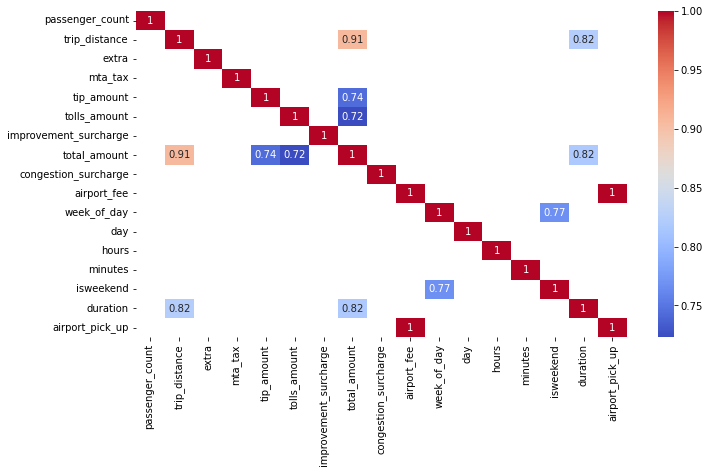

In [82]:
cr=taxi3.corr()
cr1=cr[abs(cr)>.7]
plt.figure(figsize=[11,6])
sns.heatmap(cr1,annot=True,cmap="coolwarm")

In [83]:
taxi3.drop(columns=["airport_fee","week_of_day"],inplace=True)

#### Dummy Creation

In [84]:
final=pd.get_dummies(data=taxi3,drop_first=True)

C:\Users\riama\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [85]:
final.head()

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,day,...,fare_cat_(50-60],fare_cat_(60-70],fare_cat_(70-80],fare_cat_(80-90],fare_cat_(90-100],fare_cat_100+,duration_cat_duration_bt_0_30m,duration_cat_duration_bt_30_60m,duration_cat_duration_bt_60_120m,duration_cat_duration_morethan_120m
11293,1.0,1.75,0.0,0.5,2.00,0.0,0.3,14.80,2.5,1,...,0,0,0,0,0,0,0,0,0,0
3241804,1.0,9.16,0.0,0.5,0.00,0.0,0.3,39.30,2.5,29,...,0,0,0,0,0,0,0,1,0,0
2122208,1.0,5.00,3.0,0.5,2.00,0.0,0.3,25.80,2.5,19,...,0,0,0,0,0,0,1,0,0,0
645015,1.0,3.02,1.0,0.5,1.78,0.0,0.3,19.58,2.5,6,...,0,0,0,0,0,0,1,0,0,0
1752107,1.0,3.53,0.5,0.5,2.74,0.0,0.3,21.04,2.5,15,...,0,0,0,0,0,0,1,0,0,0


In [86]:
final.columns

Index(['passenger_count', 'trip_distance', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'day', 'hours', 'minutes', 'isweekend',
       'duration', 'airport_pick_up', 'VendorID_2',
       'RatecodeID_Nassau_or_Westchester', 'RatecodeID_Negotiated_fare',
       'RatecodeID_Newark', 'RatecodeID_Standard_rate', 'RatecodeID_other',
       'store_and_fwd_flag_Y', 'payment_type_Credit_card',
       'payment_type_Dispute', 'payment_type_No_charge',
       'day_cut_mid_of_month', 'day_cut_starting_of_month',
       'hours_cat_early_morning', 'hours_cat_evening', 'hours_cat_midnight',
       'hours_cat_morning', 'hours_cat_night', 'fare_cat_(10-20]',
       'fare_cat_(20-30]', 'fare_cat_(30-40]', 'fare_cat_(40-50]',
       'fare_cat_(50-60]', 'fare_cat_(60-70]', 'fare_cat_(70-80]',
       'fare_cat_(80-90]', 'fare_cat_(90-100]', 'fare_cat_100+',
       'duration_cat_duration_bt_0_30m', 'duration_cat_duration_bt_3

In [87]:
final.drop(columns=['fare_cat_(10-20]',
       'fare_cat_(20-30]', 'fare_cat_(30-40]', 'fare_cat_(40-50]',
       'fare_cat_(50-60]', 'fare_cat_(60-70]', 'fare_cat_(70-80]',
       'fare_cat_(80-90]', 'fare_cat_(90-100]', 'fare_cat_100+'],inplace=True)

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

In [89]:
y=final["total_amount"]
x=final.drop(columns=["total_amount"])

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [91]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [92]:
print("Train Score",rfr.score(x_train,y_train))
print("Test Score",rfr.score(x_test,y_test))

Train Score 0.9974205751623206
Test Score 0.9831431989792434


In [93]:
pred_train=rfr.predict(x_train)
pred_test=rfr.predict(x_test)

In [94]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))          
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 0.6578165150409907
Train rmse 0.8110588850638347
Train MAE 0.19539604859389356
Train MAPE 0.00855762185216984


In [95]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 4.25500018165516
Test rmse 2.0627651785055807
Test MAE 0.5163516992790952
Test MAPE 0.023026048000405027


In [1]:
import xgboost